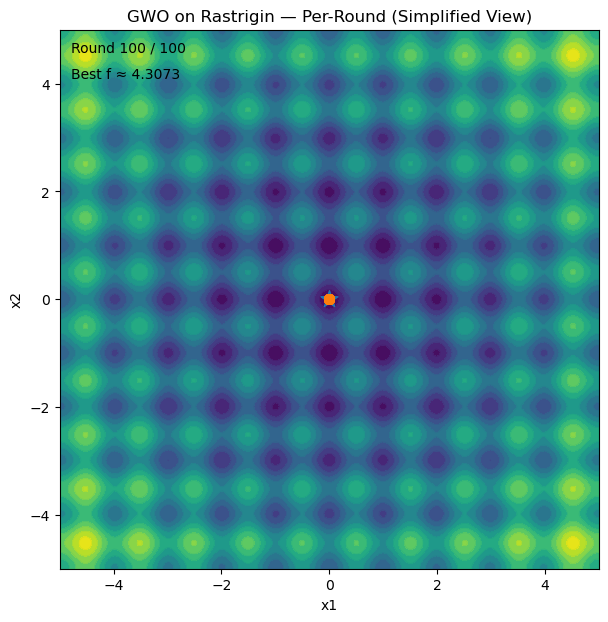

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import time
from IPython.display import display, clear_output

# -------------------------------
n_rounds = 100
n_wolves = 20
dim = 20
domain = [-5, 5]

def f(pos):
    x = np.asarray(pos)
    return np.sum(x**2 - 10*np.cos(2*np.pi*x) + 10)

rng = np.random.default_rng() # Delete seed 
wolves = [rng.uniform(domain[0], domain[1], dim) for _ in range(n_wolves)]
positions_history = []

for k in range(n_rounds):
    sorted_idx = sorted(range(n_wolves), key=lambda i: f(wolves[i]))
    X_alpha, X_beta, X_delta = wolves[sorted_idx[0]], wolves[sorted_idx[1]], wolves[sorted_idx[2]]
    positions_history.append(np.array(wolves))
    for i in range(n_wolves):
        X = wolves[i]
        C1, C2, C3 = rng.uniform(0,4,dim), rng.uniform(0,4,dim), rng.uniform(0,4,dim) #(0,2,dim) --> (0,4,dim)
        lower, upper = -1 + k/n_rounds, 1 - k/n_rounds
        A1, A2, A3 = rng.uniform(lower,upper,dim), rng.uniform(lower,upper,dim), rng.uniform(lower,upper,dim)
        D_alpha = np.abs(C1*X_alpha - X)
        D_beta  = np.abs(C2*X_beta  - X)
        D_delta = np.abs(C3*X_delta - X)
        X1 = X_alpha - A1*D_alpha
        X2 = X_beta  - A2*D_beta
        X3 = X_delta - A3*D_delta
        X_new = (X1 + X2 + X3)/3
        wolves[i] = np.clip(X_new, domain[0], domain[1])

# Contour 2D (ใช้มิติ 0 และ 1)
x = np.linspace(domain[0], domain[1], 200)  # ลด grid เพื่ออ่านง่าย
y = np.linspace(domain[0], domain[1], 200)
Xg, Yg = np.meshgrid(x, y)
Z = (Xg**2 - 10*np.cos(2*np.pi*Xg) + 10) + (Yg**2 - 10*np.cos(2*np.pi*Yg) + 10)

fig, ax = plt.subplots(figsize=(7, 7))
ax.set_xlim(domain[0], domain[1]); ax.set_ylim(domain[0], domain[1])
ax.set_aspect('equal', 'box')
ax.set_xlabel("x1"); ax.set_ylabel("x2")
ax.set_title("GWO on Rastrigin — Per-Round (Simplified View)")

# เติมสี + เส้นบาง
ax.contourf(Xg, Yg, Z, levels=15)
ax.contour(Xg, Yg, Z, levels=15, linewidths=0.5)

# global minimum (0,0)
ax.scatter([0], [0], marker='*', s=160, zorder=3)

# จุดหมาป่าใหญ่ขึ้น
scat = ax.scatter(positions_history[0][:, 0], positions_history[0][:, 1], s=48, alpha=0.95, zorder=3)

txt_round = ax.text(0.02, 0.98, f"Round 1 / {len(positions_history)}", transform=ax.transAxes,
                    ha="left", va="top")
txt_best  = ax.text(0.02, 0.93, "", transform=ax.transAxes, ha="left", va="top")

def best_value(pos_round):
    return min(f(p) for p in pos_round)

for t, pos in enumerate(positions_history, start=1):
  if t % 10 == 0:
      scat.set_offsets(pos[:, :2])
      txt_round.set_text(f"Round {t} / {len(positions_history)}")
      txt_best.set_text(f"Best f ≈ {best_value(pos):.4f}")
      clear_output(wait=True)
      display(fig)
      plt.pause(0.001)
      time.sleep(0.5)   # ปรับช้าหรือเร็วได้

# for t, pos in enumerate(positions_history, start=1):
#     scat.set_offsets(pos[:, :2])
#     txt_round.set_text(f"Round {t} / {len(positions_history)}")
#     txt_best.set_text(f"Best f ≈ {best_value(pos):.4f}")
#     clear_output(wait=True)
#     display(fig)
#     plt.pause(0.001)
#     time.sleep(0.5)   # ปรับช้าหรือเร็วได้



plt.close(fig)
